In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [10]:
# Import countries polygons
fp = os.path.join('data', 'ne_50m_admin_0_countries', 'ne_50m_admin_0_countries.shp')
countries = gpd.read_file(fp)

# Simplify column names
countries.columns = countries.columns.str.lower()
# Select columns for analysis

countries = countries[['admin', 'type', 'geometry']]
countries.head()

,admin,type,geometry
0,Zimbabwe,Sovereign country,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Zambia,Sovereign country,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Yemen,Sovereign country,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Vietnam,Sovereign country,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Venezuela,Sovereign country,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


In [9]:
fp = os.path.join('data', 'arctic_communities.geojson')
df = gpd.read_file(fp)

df.head()

,admin,country,n_communities,geometry
0,United States of America,US,115,"MULTIPOLYGON (((-132.74687 56.52568, -132.7576..."
1,United Kingdom,GB,96,"MULTIPOLYGON (((-2.66768 51.62300, -2.74214 51..."
2,Sweden,SE,133,"MULTIPOLYGON (((19.07646 57.83594, 18.99375 57..."
3,Russia,RU,774,"MULTIPOLYGON (((145.88154 43.45952, 145.89561 ..."
4,Norway,NO,48,"MULTIPOLYGON (((20.62217 69.03687, 20.49199 69..."


In [14]:
# Import country names from URL
URL = 'https://raw.githubusercontent.com/MEDS-eds-220/MEDS-eds-220-course/refs/heads/main/book/chapters/lesson-12-merge-data/country_names.csv'
country_names = pd.read_csv(URL)
country_names.head()

,country,admin
0,RU,Russia
1,LV,Latvia
2,EE,Estonia
3,LT,Lithuania
4,SE,Sweden


In [17]:
df.geom_type

0     MultiPolygon
1     MultiPolygon
2     MultiPolygon
3     MultiPolygon
4     MultiPolygon
5     MultiPolygon
6          Polygon
7          Polygon
8     MultiPolygon
9     MultiPolygon
10    MultiPolygon
11    MultiPolygon
12    MultiPolygon
13    MultiPolygon
14         Polygon
dtype: object

The majority of the columns are multipolygons, meaning they are cells made of polygons which have been stored together.

In [19]:
def checkPolygons(gbf):
        geom_types = gbf.geom_type.unique()
        if len(geom_types) > 1:
            print("Multiple feature types:", geom_types)
        else:
            print("All features are:", geom_types)
checkPolygons(df)

Multiple feature types: ['MultiPolygon' 'Polygon']


In [20]:
df = df.explode(index_parts = False).reset_index(drop = True)
checkPolygons(df)

All features are: ['Polygon']


In [32]:
row = df.iloc[0]

# Geoseries
print(type(row))

# Shape polygon
print(type(row.geometry))

# Print min_x, min_y, max_x, max_y
print(row.geometry.bounds)

def min_y(df_row):
    return(df_row.geometry.bounds[1])

<class 'pandas.core.series.Series'>
<class 'shapely.geometry.polygon.Polygon'>
(-132.948046875, 56.511035156249996, -132.56796875, 56.794775390625)


In [34]:
df['miny'] = df.apply(min_y, axis = 1)

In [37]:
arctic = df[df['miny'] >= 40]
arctic = arctic.to_crs('epsg:3413')

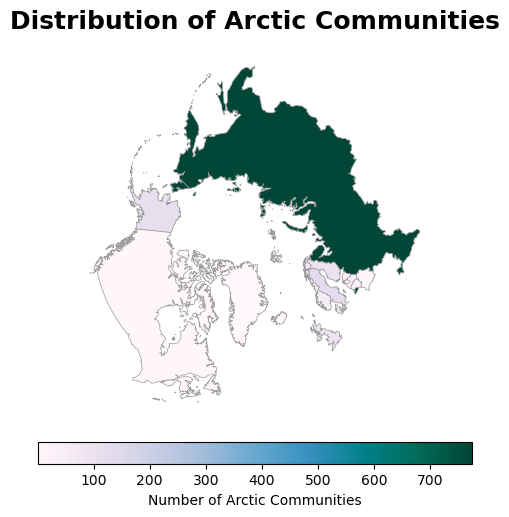

In [39]:
fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Create choropleth map of communities
# Plot with refined color and edge style
arctic.plot(
    ax=ax,
    column='n_communities',
    cmap='PuBuGn',
    legend=True,
    edgecolor="0.6",
    linewidth=0.5,
    legend_kwds={
        "shrink": 0.7,
        "label": "Number of Arctic Communities",
        "orientation": "horizontal",
        "pad": 0.05
    }
)

# Add title and subtitle for better context
ax.set_title('Distribution of Arctic Communities', fontsize=18, weight='bold', pad=15)

plt.show()